# Exploratory Analysis of Exam Test Score Data

The dataset analysed is available at Kaggle via: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams  
This notebook is intended to demonstrate initial exploration of a simple data set, some plotting and graphical analysis, and lead into a deeper dive in a separate future notebook.

All analysis is performed using Python.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("exams.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2d05bd787f0>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x2d05bd78e80>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x2d05bd783c8>,
 'medians': [<matplotlib.lines.Line2D at 0x2d05ba7c550>,
 'fliers': [<matplotlib.lines.Line2D at 0x2d05ba7c898>,
 'means': []}

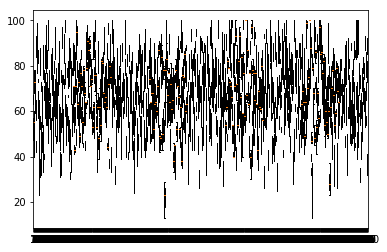

In [5]:
plt.boxplot(data[['math score','reading score','writing score']])

In [6]:
data.rename(columns={'race/ethnicity':'race',
                    'parental level of education':'parent_education',
                    'test preparation course':'test_prep'},inplace=True)
data.head()

,gender,race,parent_education,lunch,test_prep,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [7]:
#For Loop to produce groupby means for the different categorical elements
for i in data.columns[0:5]:
    globals()['Data_%s' % i] = data.groupby(by=i).mean()

In [8]:
print(Data_gender.head())
print(Data_race.head(10))
print(Data_parent_education)
print(Data_lunch.head())
print(Data_test_prep.head())

        math score  reading score  writing score
gender                                          
female   63.196687      71.888199      71.708075
male     69.384913      66.305609      64.029014
         math score  reading score  writing score
race                                             
group A   65.215190      68.556962      66.974684
group B   63.170732      67.102439      65.736585
group C   63.130031      66.383901      64.523220
group D   69.267176      72.087786      72.259542
group E   74.465649      72.526718      70.213740
                    math score  reading score  writing score
parent_education                                            
associate's degree   69.536946      70.985222      70.113300
bachelor's degree    71.491071      74.008929      74.410714
high school          65.207921      67.400990      64.846535
master's degree      71.585714      75.428571      75.885714
some college         65.297297      68.045045      66.734234
some high school     60.701

Text(0.5, 1.0, 'Math Score by Test Prep')

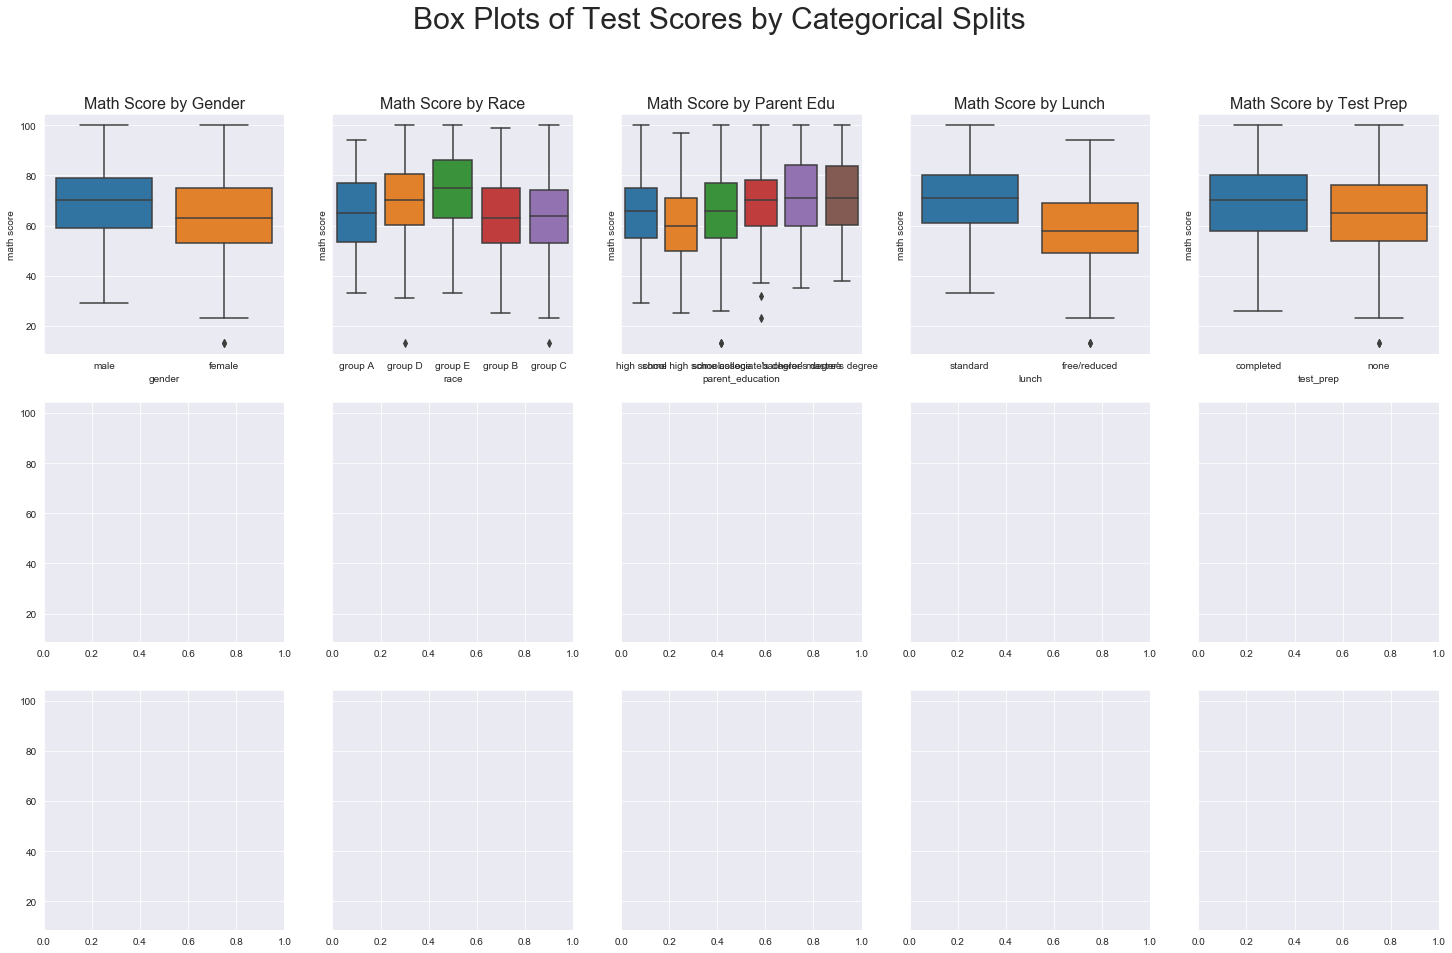

In [27]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(3, 5, figsize=(25, 15), sharey=True)
fig.suptitle('Box Plots of Test Scores by Categorical Splits', size=30)


# Box plot Math Score by Gender
sns.boxplot(ax = axes[0,0],
            x = 'gender',
            y = 'math score',
            data = data)
axes[0,0].set_title('Math Score by Gender',size=16)

# Box plot Math Score by Race
sns.boxplot(ax = axes[0,1],
            x = 'race',
            y = 'math score',
            data = data)
axes[0,1].set_title('Math Score by Race',size=16)

# Box plot Math Score by Parent Education Level
##Change Rotation of xticks on this plot
sns.boxplot(ax = axes[0,2],
            x = 'parent_education',
            y = 'math score',
            data = data)
axes[0,2].set_title('Math Score by Parent Edu',size=16)

# Box plot Math Score by Lunch
sns.boxplot(ax = axes[0,3],
            x = 'lunch',
            y = 'math score',
            data = data)
axes[0,3].set_title('Math Score by Lunch',size=16)

# Box plot Math Score by Test Preparation
sns.boxplot(ax = axes[0,4],
            x = 'test_prep',
            y = 'math score',
            data = data)
axes[0,4].set_title('Math Score by Test Prep',size=16)